# timeseries_fastai
>This repository aims to implement TimeSeries classification/regression algorithms. It makes extensive use of fastai training methods.

## Installation

In short, if you have anaconda, execute:

`$ pip install fastai_timeseries`

## Time Series Classification from Scratch with Deep Neural Networks: A Strong Baseline
The original paper repo is [here](https://github.com/cauchyturing/UCR_Time_Series_Classification_Deep_Learning_Baseline) is implemented in Keras/Tf.

- Notebook 01: This is a basic notebook that implements the Deep Learning models proposed in [Time Series Classification from Scratch with Deep Neural Networks: A Strong Baseline](https://arxiv.org/abs/1611.06455). 

## InceptionTime: Finding AlexNet for Time SeriesClassification
The original paper repo is [here](https://github.com/hfawaz/InceptionTime)

- Notebook 02: Added InceptionTime architecture from [InceptionTime: Finding AlexNet for Time SeriesClassification](https://arxiv.org/pdf/1909.04939.pdf). 

## Results
> Results for InceptionTime

You can run the benchmark using:

`$python ucr.py --arch='inception' --tasks='all' --filename='inception.csv' --mixup=0.2`

### Default Values:
- `lr` = 1e-3
- `opt` = 'ranger'
- `epochs` = 40
- `fp16` = True

In [ ]:
import pandas as pd
from pathlib import Path

In [ ]:
results_inception = pd.read_csv(Path.cwd().parent/'inception.csv', index_col=0)
results_inception

,acc,acc_max,train_loss,val_loss
task,,,,
Adiac,0.063939,0.063939,3.254499,4.328088


## Getting Started

In [ ]:
from timeseries_fastai.imports import *
from timeseries_fastai.core import *
from timeseries_fastai.data import *
from timeseries_fastai.models import *

In [ ]:
ucr_path = untar_data(URLs.UCR)

In [ ]:
df_train, df_test = load_df_ucr(ucr_path, 'StarLightCurves')

Loading files from: /home/tc256760/.fastai/data/Univariate2018_arff/StarLightCurves


In [ ]:
df = stack_train_valid(df_train, df_test)

In [ ]:
x_cols = df.columns[0:-2].to_list()

In [ ]:
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att1017,att1018,att1019,att1020,att1021,att1022,att1023,att1024,target,valid_col
0,0.537303,0.531103,0.528503,0.529403,0.533603,0.540903,0.551103,0.564003,0.579603,0.597603,...,0.545903,0.543903,0.541003,0.537203,0.532303,0.526403,0.519503,0.511403,b'3',False
1,0.588398,0.593898,0.599098,0.604098,0.608798,0.613397,0.617797,0.622097,0.626097,0.630097,...,0.246499,0.256199,0.266499,0.277399,0.288799,0.300899,0.313599,0.326899,b'3',False
2,-0.049900,-0.041500,-0.033400,-0.025600,-0.018100,-0.010800,-0.003800,0.003000,0.009600,0.015900,...,-0.161601,-0.149201,-0.136401,-0.123201,-0.109701,-0.095901,-0.081701,-0.067100,b'1',False
3,1.337005,1.319805,1.302905,1.286305,1.270005,1.254005,1.238304,1.223005,1.208104,1.193504,...,1.298505,1.307705,1.316505,1.324905,1.332805,1.340205,1.347005,1.353205,b'3',False
4,0.769801,0.775301,0.780401,0.785101,0.789401,0.793301,0.796801,0.799901,0.802601,0.805101,...,0.744501,0.747301,0.750701,0.754801,0.759501,0.765001,0.771301,0.778401,b'3',False


In [ ]:
dls = TSDataLoaders.from_df(df, x_cols=x_cols, label_col='target', valid_col='valid_col', bs=16)

In [ ]:
dls.vocab

(#3) [b'1',b'2',b'3']

In [ ]:
inception = create_inception(1, len(dls.vocab))

In [ ]:
learn = Learner(dls, inception, metrics=[accuracy])

In [ ]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.346574,0.216900,0.926906,00:15
1,0.262913,0.274731,0.888417,00:15
2,0.194458,0.131948,0.968917,00:15
3,0.154791,0.126375,0.967581,00:15
4,0.109763,0.101232,0.973774,00:15


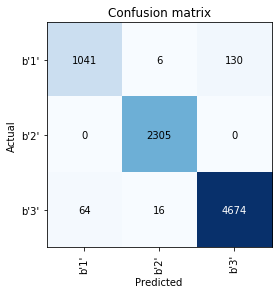

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Export -

In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted 02_models.ipynb.
Converted 99_index.ipynb.
